# Logistic Regression

Predicting categorical varibles is called classification.
- Classification invovles predicting the probability of each of the categories for a given observation, an d assigning the observation to the category with the highest probability.
- One approach- Logistic regression: common for binary (binomial) classification; using the logistic function (sigmoid function)
- Multinomial logistic regression
- Ordinal logistic regression


### Logistic function
* logistic regression: statistical model that used the logistic (logit) function, as the equation between x and y (also called sigmoid function or S-shaped curve)
* Returns only values between 0 and 1 the dependent variable, irrespective of the values of the independent variable.
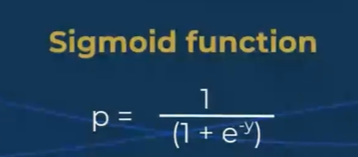

logistic regrssion uses same underlying formula as linear regression but it is regressing for the *probability* of a *categorical* outcome.
* 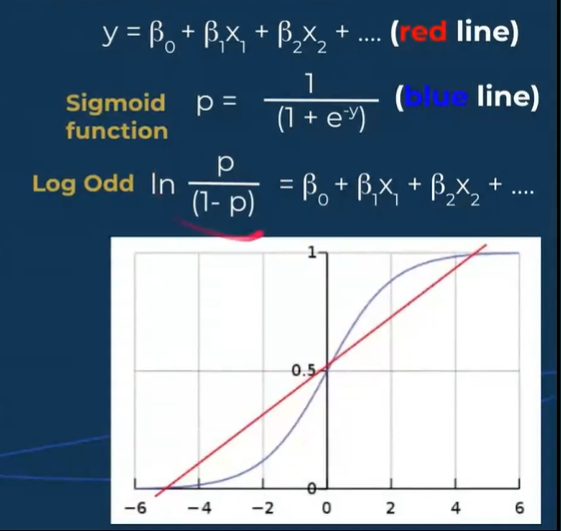

### Confusion matrix
 it is an NxN table that summarises a classification model's predictions.
 - True Positive (TP), False Positive (FP), 
 False Negative (FN), True Negative (TN)
 - True xxx: correct predictions; False xxx: incorrect
 

## Logistic Regression

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# importing the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = data.iloc[:,[0,1,2,3]].values
y = data.iloc[:,4].values

X = X.reshape(-1, 4)
X = preprocessing.scale(X) # scale the data so that it is easier to fit

X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=0)



In [ ]:
# fit a model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

### Measuring Model Performance


To measure a model's performance, you want to get a sense of overall performance as well as performance for each class. Since the Iris dataset is totally balanced, accuracy is an appropriate measure of performance for the classification overall. An accuracy score is provided with the scikit-learn method as the 'score' attribute.

In [ ]:
# use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))


Accuracy: 0.9736842105263158


You can also check how the model did for different classes. The confusion matrix shows us that the model found instances of the species Versicolor the hardest to classify correctly.  

In [ ]:
from sklearn.metrics import confusion_matrix

classes = list(iris.target_names)
conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


Looking at the confusion matrix is one way of inspecting performance in more detail. Looking at the f1 score,  
precision and recall are another way. The imperfect average f1 score tells us not all instances were classified perfectly, and the per-class f1 scores tells us which classes were the most problematic. 

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# average f1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print(av_f1)

# f1 score per class
f = f1_score(y_test, y_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

0.9736842105263158
Hardest class: virginica


The precision and recall for that species then tell us more. What what went wrong is that not the model was too strict about what instances could be considered Virginica, or perhaps mistook them for another class.

In [ ]:
# precision and recall for virginica  
prec = precision_score(y_test == classes.index('virginica'), y_pred == classes.index('virginica'))
rec = recall_score(y_test == classes.index('virginica'), y_pred == classes.index('virginica'))

print('Precision:', prec)
print('Recall:', rec)


Precision: 0.9
Recall: 1.0


We could use this information to, for example, decide to collect more instances of this species.